In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport lab1

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Робота з зображеннями

In [3]:
image_tensor = lab1.read_images('data/images/')
image_tensor.shape

(4, 100, 100, 3)

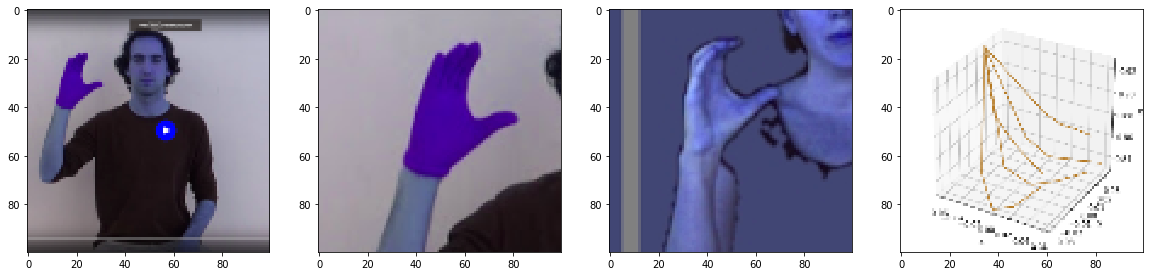

In [4]:
fig, axes = plt.subplots(1, image_tensor.shape[0], figsize=(20,20))

for ax, image in zip(axes, image_tensor):
    ax.imshow(image)

# Частотний аналіз

In [5]:
#lab1.load_pages('data/articles/', num_pages=20)

In [6]:
raw = lab1.read_raw_text('data/articles/') # get array of all words in lowercase
len(raw)

11202

In [7]:
words = np.unique(raw)
enc = lab1.one_hot_encoder(raw, words) # encode to one-hot
enc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [8]:
hist = enc.sum(axis=0) # get histogram
hist

array([354,   1,   2, ...,   1,   1,   1])

In [9]:
a = np.argsort(hist)[::-1] #sort two arrays
enc = enc[a]
hist = hist[a]
hist

array([705, 414, 354, ...,   1,   1,   1])

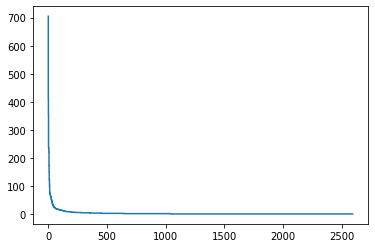

In [10]:
plt.step(range(len(hist)), hist);

In [11]:
enc = enc[len(enc)*5//100 : len(enc)*95//100] #remove 5% from top and end of the array
hist = hist[len(hist)*5//100 : len(hist)*95//100]
hist

array([12, 12, 12, ...,  1,  1,  1])

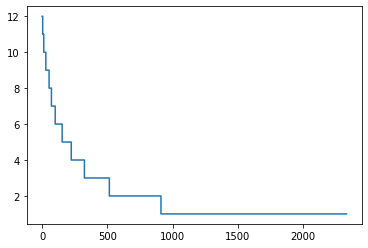

In [12]:
plt.step(range(len(hist)), hist);

In [14]:
words[np.where(enc[0]==1)] # most common word

array(['our'], dtype='<U162')